## [Survey of Consumer Finance (SCF)](https://www.federalreserve.gov/econres/scfindex.htm) data cleaning and analysis 

- the code builds on this [blog](https://notebook.community/DaveBackus/Data_Bootcamp/Code/Lab/SCF_data_experiment_Brian)

In [41]:
import numpy as np
import pandas as pd   #The data package
import matplotlib.pyplot as plt 

In [42]:
## figure plotting configurations

plt.style.use('seaborn-v0_8')
plt.rcParams["font.family"] = "Times New Roman" #'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['axes.labelweight'] = 'bold'

## Set the 
plt.rc('font', size=15)
# Set the axes title font size
plt.rc('axes', titlesize=15)
# Set the axes labels font size
plt.rc('axes', labelsize=15)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=15)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=15)
# Set the legend font size
plt.rc('legend', fontsize=15)
# Set the font size of the figure title
plt.rc('figure', titlesize=15)

In [43]:
import requests
import io
import zipfile      #Three packages we'll need to unzip the data


In [44]:
def unzip_survey_file(year = '2013'):
    """
    The next two lines of code converts the URL into a format that works
    with the "zipfile" package.
    """
    if int(year) <1989:
        url = 'http://www.federalreserve.gov/econres/files/'+year+'_scf'+year[2:]+'bs.zip'
        #old url = 'http://www.federalreserve.gov/econresdata/scf/files/'+year+'_scf'+year[2:]+'bs.zip'

    else: 
        url = 'http://www.federalreserve.gov/econres/files/scfp'+year+'s.zip'    
    url = requests.get(url)
    """
    Next, zipfile downloads, unzips, and saves the file to your computer. 'url2013_unzipped' 
    contains the file path for the file.
    """
    url_unzipped = zipfile.ZipFile(io.BytesIO(url.content))
    return url_unzipped.extract(url_unzipped.namelist()[0])

In [ ]:
## keep the code for each year for future use

## which year? choose from 1983,1992,2001,2013,2016,2019 
year = '2016'  

df = pd.read_stata(unzip_survey_file(year=year))

## to rename some variables for 1983 vintage 
#df1983 = df1983.rename(columns = {'b3201':'income', 'b3324':'networth', 'b3015' : 'wgt'})
#df1983 = df1983[df1983['income']>=0]

In [68]:
list(df.columns)

['yy1',
 'y1',
 'wgt',
 'hhsex',
 'age',
 'agecl',
 'educ',
 'edcl',
 'married',
 'kids',
 'lf',
 'lifecl',
 'famstruct',
 'racecl',
 'racecl4',
 'racecl5',
 'racecl_ex',
 'race',
 'occat1',
 'occat2',
 'indcat',
 'foodhome',
 'foodaway',
 'fooddelv',
 'rent',
 'income',
 'wageinc',
 'bussefarminc',
 'intdivinc',
 'kginc',
 'ssretinc',
 'transfothinc',
 'penacctwd',
 'norminc',
 'wsaved',
 'saved',
 'savres1',
 'savres2',
 'savres3',
 'savres4',
 'savres5',
 'savres6',
 'savres7',
 'savres8',
 'savres9',
 'spendmor',
 'spendless',
 'expenshilo',
 'late',
 'late60',
 'hpayday',
 'bnkruplast5',
 'knowl',
 'yesfinrisk',
 'nofinrisk',
 'crdapp',
 'turndown',
 'feardenial',
 'turnfear',
 'forecllast5',
 'emergborr',
 'emergsav',
 'emergpstp',
 'emergcut',
 'emergwork',
 'hborrff',
 'hborrcc',
 'hborralt',
 'hborrfin',
 'hsavfin',
 'hsavnfin',
 'hpstppay',
 'hpstpln',
 'hpstpoth',
 'hcutfood',
 'hcutent',
 'hcutoth',
 'finlit',
 'bshopnone',
 'bshopgrdl',
 'bshopmodr',
 'ishopnone',
 'ishopg

## Variable definitions 

- [code book for 2016](https://sda.berkeley.edu/sdaweb/docs/scfcomb2016/DOC/hcbk0007.htm)
- The [definition](https://www.federalreserve.gov/econres/files/Networth%20Flowchart.pdf) of networth 

In [69]:
## make new variables 
#df['lqwealth'] = df['liq']+df['govtbnd']+df['obnd']+df['stocks']+df['nmmf'] - df['ccbal'] 
## Kaplan, Violante, and Weidner (2014)/Econmetrica paper definition
df['lqwealth'] = df['liq']+df['govtbnd']+df['nmmf']-df['stmutf']-df['obmutf'] - df['ccbal'] 
#df['lqwealth'] = df['liq']+df['govtbnd'] - df['ccbal'] 

### filters and clean variables 
df = df[(df['age']>=25) & (df['age']<=85)]
df = df[df['wageinc']>0]

df = df[df['income']>0]
df = df[df['norminc']>0]
## drop negative liquid wealth 
df = df[df['lqwealth']>=0]

## compute log values 
df['lwage_income'] = np.log(df['wageinc'])
df['lincome'] = np.log(df['income'])
df['lnorminc'] = np.log(df['norminc'])

## compute ratios 
df['w2wage_income']= df['networth']/ df['wageinc']
df['lw2wage_income']= df['lqwealth']/ df['wageinc']

df['w2income']= df['networth']/ df['norminc']
df['lw2income']= df['lqwealth']/ df['norminc']

/var/folders/39/ks6jc__9375c2fl7h7pwq5jh0000gn/T/ipykernel_55076/1651995395.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lqwealth'] = df['liq']+df['govtbnd']+df['nmmf']-df['stmutf']-df['obmutf'] - df['ccbal']


In [70]:
## age polynomials regressions 

df['age2'] = df['age']**2 
df['age3'] = df['age']**3
df['age4'] = df['age']**4

import statsmodels.api as sm 
import statsmodels.formula.api as smf

model = smf.ols(formula = 'lnorminc~ age+age2+age3+age4',
                data = df)
results = model.fit()
df['lnorminc_pr'] = results.predict()


### Cross-sectional distribution of income and wealth

mean permanent income: $ 147254.599


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


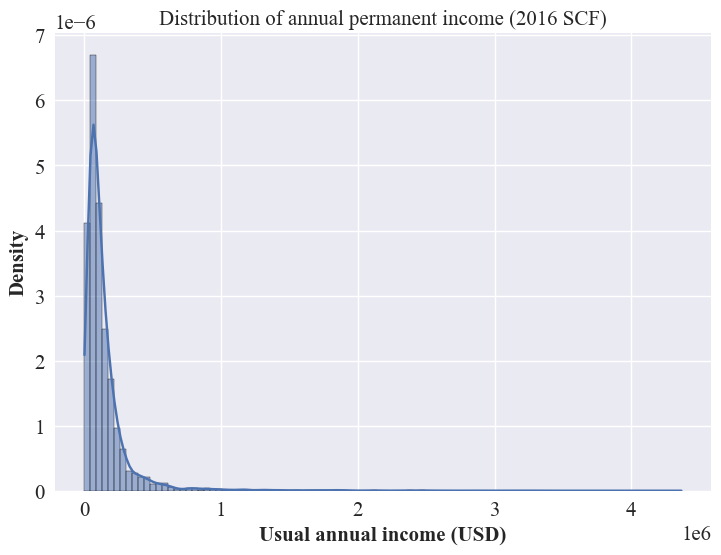

In [71]:
## distribution in monetary values 
import seaborn as sns

data_plot = df[['norminc','wgt']][df['norminc']<df['norminc'].quantile(0.95)]

dist = sns.displot(data = data_plot,
            x = 'norminc',
            weights = 'wgt',
            kde=True,
            stat = 'density',
            bins = 100).set(title='Distribution of annual permanent income (2016 SCF)',
                            xlabel='Usual annual income (USD)')

norminc_av = (data_plot['norminc']*data_plot['wgt']).sum()/data_plot['wgt'].sum()
print('mean permanent income: $', str(round(norminc_av,3)))

dist.fig.set_size_inches(8,6)

mean wage income: $ 106491.235


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


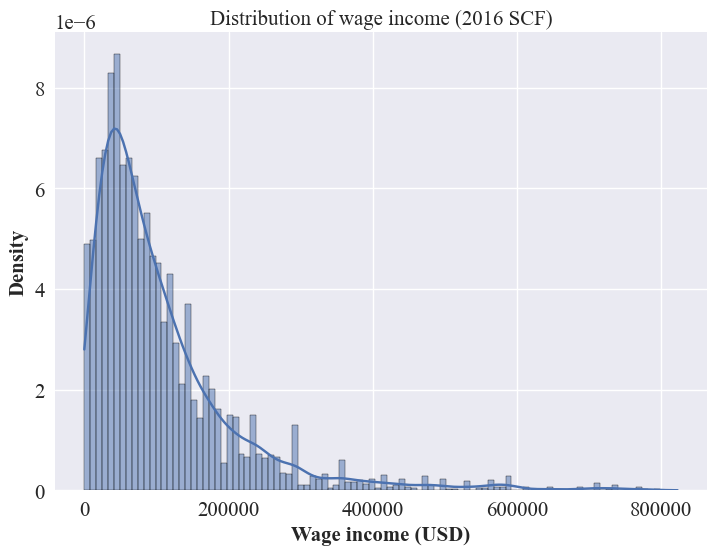

In [72]:
## distribution in monetary values 

data_plot = df[['wageinc','wgt']][df['wageinc']<df['wageinc'].quantile(0.95)]

dist = sns.displot(data = data_plot,
            x = 'wageinc',
            weights = 'wgt',
            kde=True,
            stat = 'density',
            bins = 100).set(title='Distribution of wage income (2016 SCF)',
                            xlabel='Wage income (USD)')

wageinc_av = (data_plot['wageinc']*data_plot['wgt']).sum()/data_plot['wgt'].sum()
print('mean wage income: $', str(round(wageinc_av,3)))

dist.fig.set_size_inches(8,6)

mean net liquid wealth: $ 66933.70155156715


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


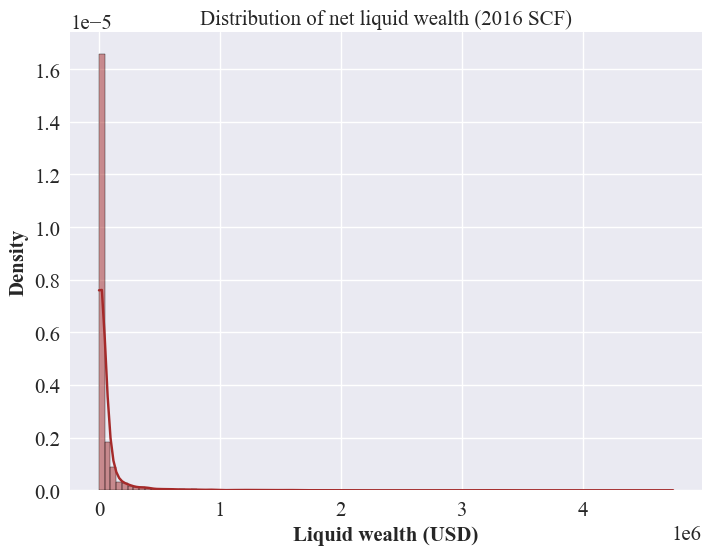

In [73]:
data_plot = df[['lqwealth','wgt']][df['lqwealth']<df['lqwealth'].quantile(0.95)]

dist = sns.displot(data = data_plot,
            x = 'lqwealth',
            weights = 'wgt',
            kde=True,
            stat = 'density',
            color = 'brown',
            bins = 100).set(title='Distribution of net liquid wealth (2016 SCF)',
                            xlabel='Liquid wealth (USD)'
)

lqwealth_av = (data_plot['lqwealth']*data_plot['wgt']).sum()/data_plot['wgt'].sum()

print('mean net liquid wealth: $', str(lqwealth_av))

dist.fig.set_size_inches(8,6)

mean net liquid wealth/income ratio:  0.24


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


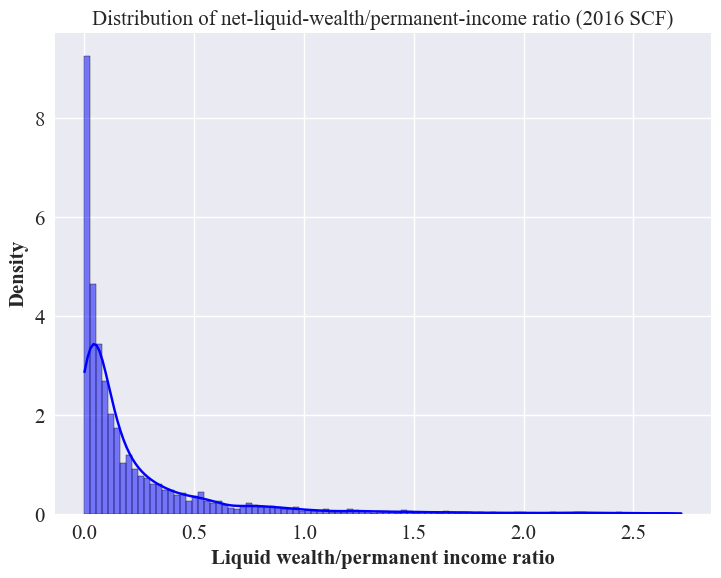

In [74]:
data_plot = df[['lw2income','wgt']][df['lw2income']<df['lw2income'].quantile(0.95)]

dist = sns.displot(data = data_plot,
            x = 'lw2income',
            weights = 'wgt',
            kde=True,
            stat = 'density',
            color = 'blue',
            bins = 100).set(title='Distribution of net-liquid-wealth/permanent-income ratio (2016 SCF)',
                            xlabel='Liquid wealth/permanent income ratio')

lw2income_av = (data_plot['lw2income']*data_plot['wgt']).sum()/data_plot['wgt'].sum()
print('mean net liquid wealth/income ratio: ', str(round(lw2income_av,2)))

dist.fig.set_size_inches(8,6)

### (Liquid) Wealth Inequality 

grid of lorenz curve: [0.         0.54751685 0.66280841 0.73075569 0.77824604 0.81411801
 0.84273098 0.86560962 0.88459144 0.90101094 0.91511987 0.92667208
 0.93613406 0.94426643 0.95136507 0.95743883 0.96253805 0.96720372
 0.97125539 0.97469649 0.9777359  0.98046739 0.98286504 0.98497132
 0.98690863 0.98853082 0.99002    0.99131893 0.99242476 0.99357209
 0.99446858 0.99518194 0.99580377 0.9963671  0.99684704 0.99726707
 0.99768193 0.99807495 0.99842265 0.9987306  0.99897306 0.99923631
 0.99940557 0.99954391 0.99967772 0.99978473 0.99986199 0.9999416
 0.99998011 0.99999741]
lorenz curve: [0.         0.02020408 0.04040816 0.06061224 0.08081633 0.10102041
 0.12122449 0.14142857 0.16163265 0.18183673 0.20204082 0.2222449
 0.24244898 0.26265306 0.28285714 0.30306122 0.32326531 0.34346939
 0.36367347 0.38387755 0.40408163 0.42428571 0.4444898  0.46469388
 0.48489796 0.50510204 0.52530612 0.5455102  0.56571429 0.58591837
 0.60612245 0.62632653 0.64653061 0.66673469 0.68693878 0.70714286
 0.7

(0.0, 1.0)

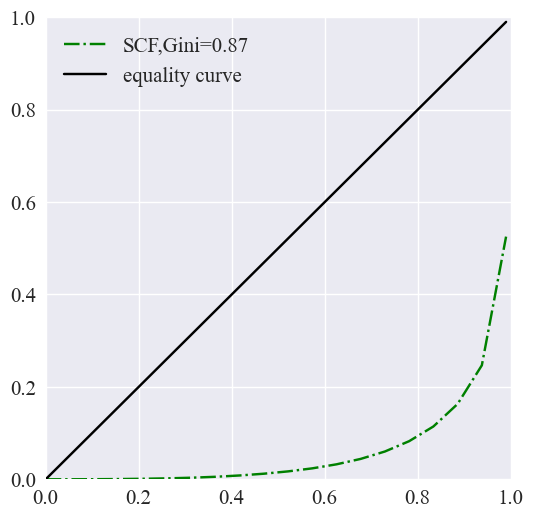

In [75]:
from Utility import get_lorenz_curve, get_gini, weighted_percentiles, figureprefs

SCF_lq_share_agents_ap, SCF_lq_share_ap = get_lorenz_curve(df, 'lqwealth', 'wgt',nb_share_grid = 50)
print('grid of lorenz curve:', SCF_lq_share_agents_ap)
print('lorenz curve:', SCF_lq_share_ap)

gini_lq_SCF = get_gini(df, 'lqwealth', 'wgt')

SCF_lq_share_agents_ap_inverse, SCF_lq_share_ap_inverse = get_lorenz_curve(df, 'lqwealth', 'wgt',nb_share_grid = 20,how='population_to_wealth')
print('grid of lorenz curve:', SCF_lq_share_agents_ap_inverse)
print('lorenz curve:', SCF_lq_share_ap_inverse)


## plot lorenz curve 
fig, ax = plt.subplots(figsize=(6,6))

#ax.plot(SCF_lq_share_agents_ap,
#        SCF_lq_share_ap, 'r-.',
#        label='SCF (inversely calcualted),Gini={}'.format(round(gini_lq_SCF,2)))

ax.plot(SCF_lq_share_agents_ap_inverse,
        SCF_lq_share_ap_inverse, 'g-.',
        label='SCF,Gini={}'.format(round(gini_lq_SCF,2)))

ax.plot(SCF_lq_share_ap,
        SCF_lq_share_ap, 
        'k-',
        label='equality curve')

ax.legend()
plt.xlim([0,1])
plt.ylim([0,1])

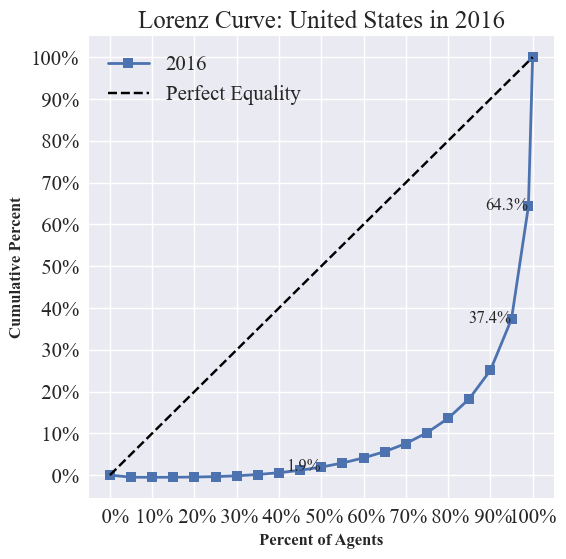

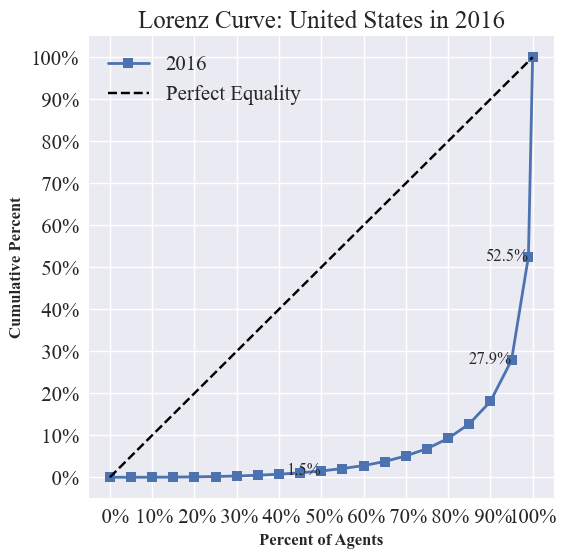

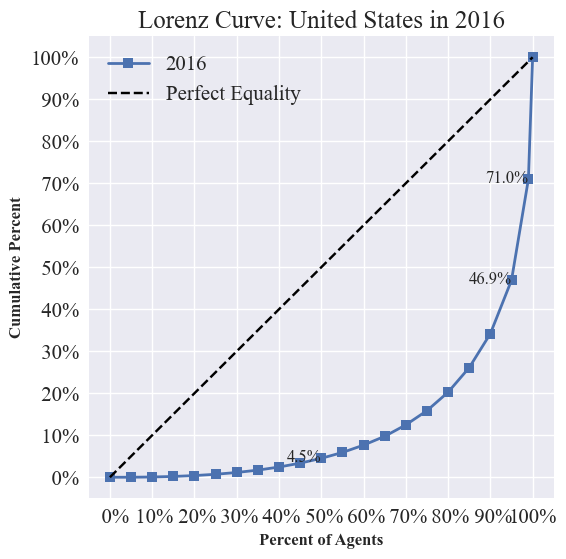

In [76]:
## plot a different version of lorenz curve with percentile of wealth and more details 

years_graph = [df]
labels = ['2016']

figureprefs(years_graph, 
            variable = 'networth', 
            legendlabels = labels)
figureprefs(years_graph, 
            variable = 'lqwealth', 
            legendlabels = labels)

figureprefs(years_graph, 
            variable = 'lw2income', 
            legendlabels = labels)

In [ ]:
## create a dictionary that stores weighted mean, media, gini, and min, p10,p20,p30,p40,p50,p60,p70,p80,p90,max of liquid wealth, income, and networth, lw2income, lw2wage_income

vars = ['lw2income','lqwealth','norminc']

vars_stats_dict = {}

for var in vars:
    vars_stats_dict[var] = {}
    vars_stats_dict[var]['mean'] = (df[var]*df['wgt']).sum()/df['wgt'].sum()
    vars_stats_dict[var]['median'] = weighted_percentiles(df, var, 'wgt', percentiles = [0.5])[0]
    vars_stats_dict[var]['gini'] = get_gini(df, var, 'wgt')
    vars_stats_dict[var]['min'] = df[var].min()
    vars_stats_dict[var]['p10'] = weighted_percentiles(df, var, 'wgt', percentiles = [0.1])[0]
    vars_stats_dict[var]['p20'] = weighted_percentiles(df, var, 'wgt', percentiles = [0.2])[0]
    vars_stats_dict[var]['p30'] = weighted_percentiles(df, var, 'wgt', percentiles = [0.3])[0]
    vars_stats_dict[var]['p40'] = weighted_percentiles(df, var, 'wgt', percentiles = [0.4])[0]
    vars_stats_dict[var]['p50'] = weighted_percentiles(df, var, 'wgt', percentiles = [0.5])[0]
    vars_stats_dict[var]['p60'] = weighted_percentiles(df, var, 'wgt', percentiles = [0.6])[0]
    vars_stats_dict[var]['p70'] = weighted_percentiles(df, var, 'wgt', percentiles = [0.7])[0]
    vars_stats_dict[var]['p80'] = weighted_percentiles(df, var, 'wgt', percentiles = [0.8])[0]
    vars_stats_dict[var]['p90'] = weighted_percentiles(df, var, 'wgt', percentiles = [0.9])[0]
    vars_stats_dict[var]['max'] = df[var].max()

    ## lorenz shares over 0.05 stepsize between 0 and 1
    SCF_lq_share_agents_ap_inverse, SCF_lq_share_ap_inverse = get_lorenz_curve(df, var, 'wgt',nb_share_grid = 21,how='population_to_wealth')
    #print('grid of lorenz curve:', SCF_lq_share_agents_ap_inverse)
    ## assign the lorenz shares to the dictionary value by value
    for pop_grid_id,pop_grid in enumerate(SCF_lq_share_agents_ap_inverse):
        vars_stats_dict[var]['lorenz_share_'+str(round(pop_grid*100,2))] = SCF_lq_share_ap_inverse[pop_grid_id]
    vars_stats_dict[var]['lorenz_share_100'] = 1.0 ## corneer case 
    ## create a dataframe to store the statistics

df_stats = pd.DataFrame(vars_stats_dict)
df_stats

## export to pickle file

#df_stats.to_pickle('../data/scf_moments_'+year+'.pkl')

,lw2income,lqwealth,norminc
mean,0.375791,9.161373e+04,1.530818e+05
median,0.045066,1.490829e-02,1.749509e-01
gini,0.764948,8.738702e-01,5.114139e-01
min,0.000000,0.000000e+00,1.180247e+02
p10,0.000622,1.342979e-04,1.701420e-02
p20,0.004007,9.553155e-04,4.692630e-02
p30,0.011370,2.986766e-03,8.130220e-02
p40,0.024343,7.307393e-03,1.211111e-01
p50,0.045066,1.490829e-02,1.749509e-01
p60,0.076491,2.778370e-02,2.450548e-01


### Life-cycle wealth and income profile 

In [16]:
import joypy
from matplotlib import cm

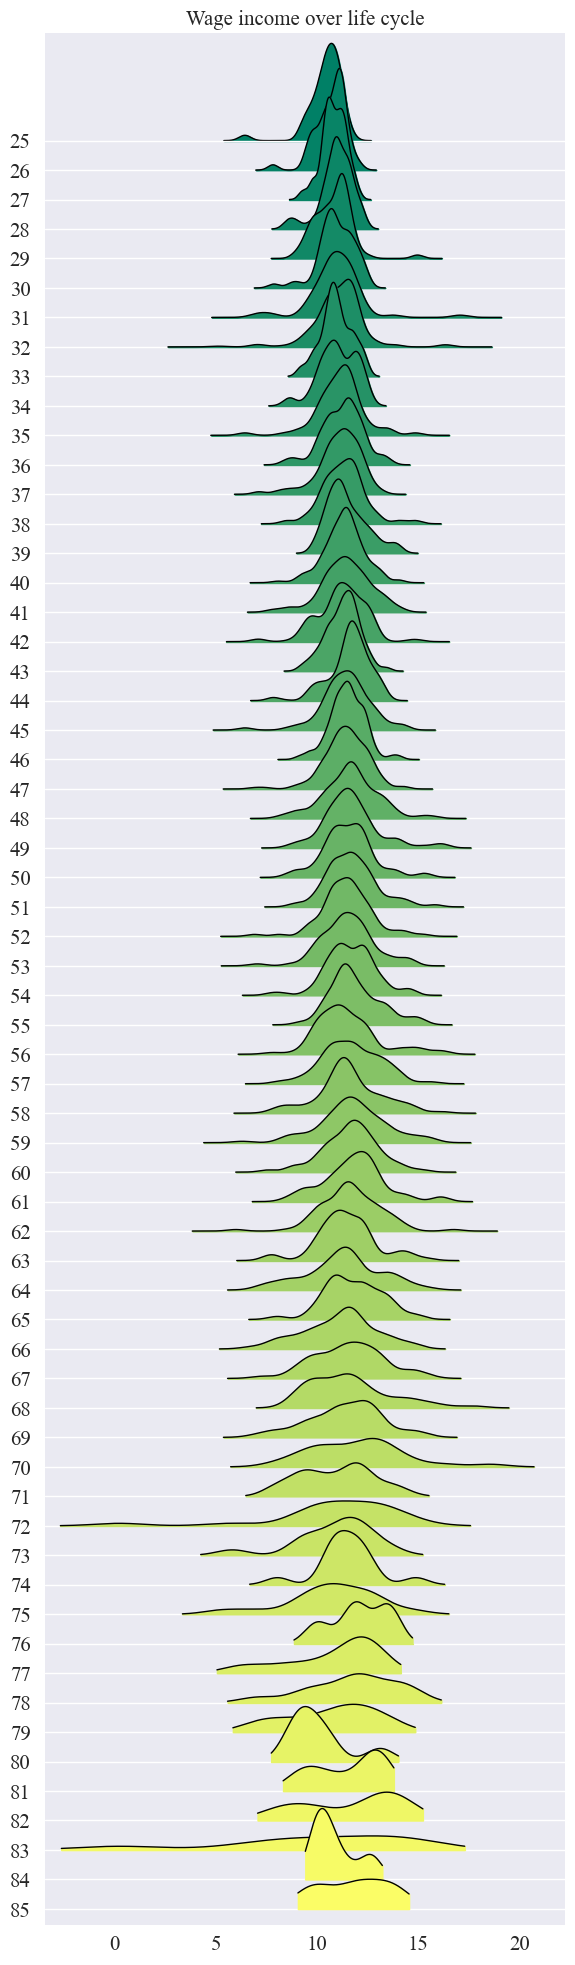

In [17]:
#labels=[y if y%10==0 else None for y in list(df.age.unique())]
fig, axes = joypy.joyplot(df, 
                          by="age", 
                          column= "lwage_income", 
                          #labels=labels, 
                          range_style='own', 
                          grid="y", 
                          linewidth=1, 
                          legend=False, 
                          figsize=(6,20),
                          title="Wage income over life cycle",
                          colormap=cm.summer)

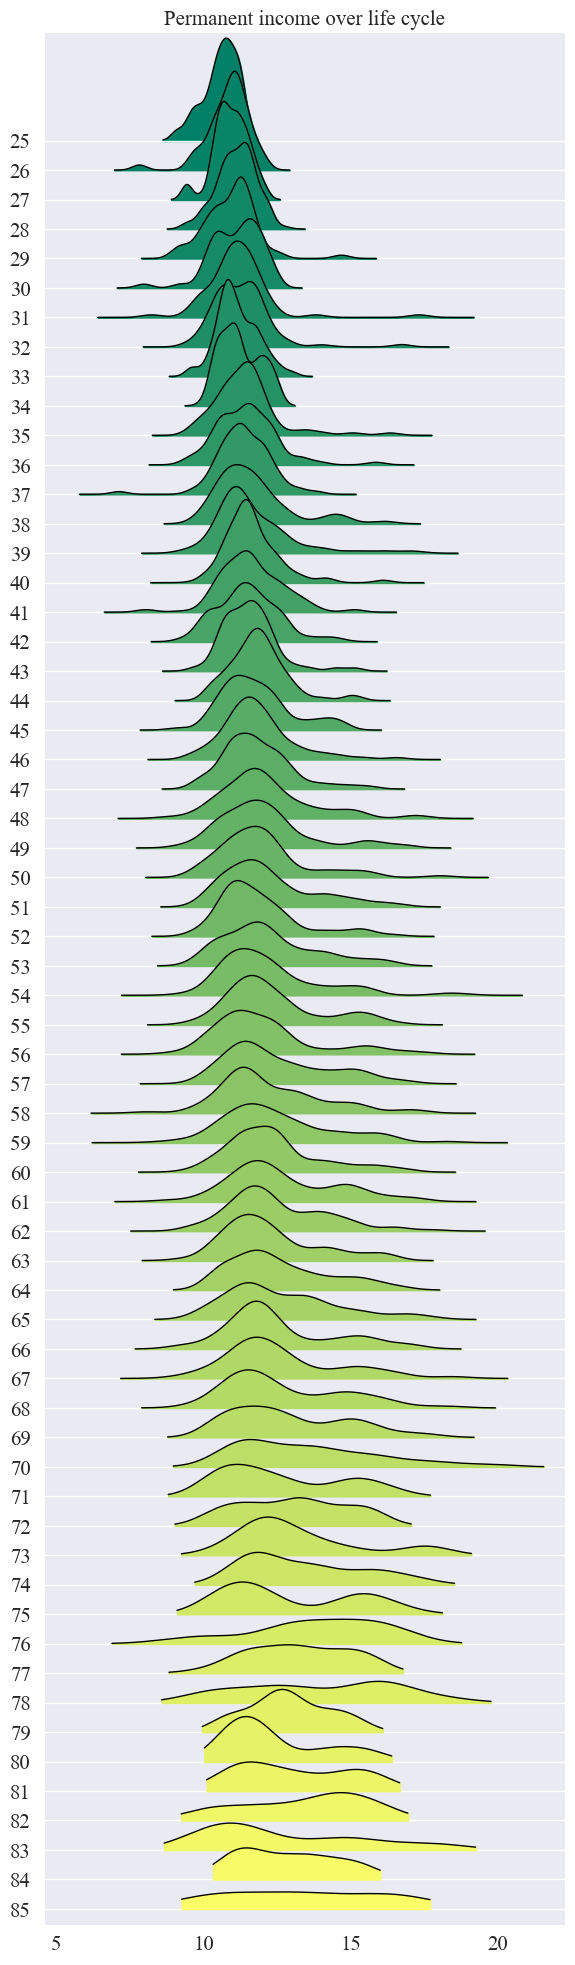

In [18]:
#labels=[y if y%10==0 else None for y in list(df.age.unique())]
fig, axes = joypy.joyplot(df, 
                          by="age", 
                          column= "lnorminc", 
                          #labels=labels, 
                          range_style='own', 
                          grid="y", 
                          linewidth=1, 
                          legend=False, 
                          figsize=(6,20),
                          title="Permanent income over life cycle",
                          colormap=cm.summer)

In [19]:
## Life cycle income / wealth profiles 

age = df['age'].unique()

wm = lambda x: np.average(x, weights=df.loc[x.index, "wgt"])

age_av_wealth = df.groupby('age').agg(av_wealth = ('networth',wm))
age_med_wealth = df.groupby('age').agg(med_wealth=('networth','median'))

age_av_lqwealth = df.groupby('age').agg(av_lqwealth = ('lqwealth',wm))
age_med_lqwealth = df.groupby('age').agg(med_lqwealth=('lqwealth','median'))

age_av_w2i = df.groupby('age').agg(av_w2i = ('w2income',wm))
age_med_w2i = df.groupby('age').agg(med_w2i=('w2income','median'))


age_av_lqw2i = df.groupby('age').agg(av_lqw2i = ('lw2income',wm))
age_med_lqw2i = df.groupby('age').agg(med_lqw2i=('lw2income','median'))

age_av_lincome = df.groupby('age').agg(av_lincome = ('lincome',wm))
age_med_lincome = df.groupby('age').agg(med_lincome=('lincome','median'))

age_av_lnorminc = df.groupby('age').agg(av_lnorminc = ('lnorminc',wm))
age_med_lnorminc = df.groupby('age').agg(med_lnorminc=('lnorminc','median'))

age_av_lwage_income = df.groupby('age').agg(av_lwage_income= ('lwage_income',wm))
age_med_lwage_income = df.groupby('age').agg(med_lwage_income= ('lwage_income','median'))


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


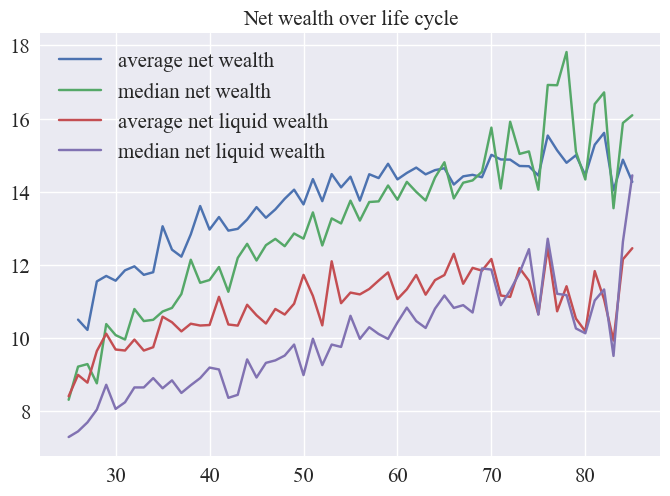

In [20]:
plt.title('Net wealth over life cycle')
plt.plot(np.log(age_av_wealth),label='average net wealth')
plt.plot(np.log(age_med_wealth),label='median net wealth')
plt.plot(np.log(age_av_lqwealth),label='average net liquid wealth')
plt.plot(np.log(age_med_lqwealth),label='median net liquid wealth')

plt.legend(loc=0)

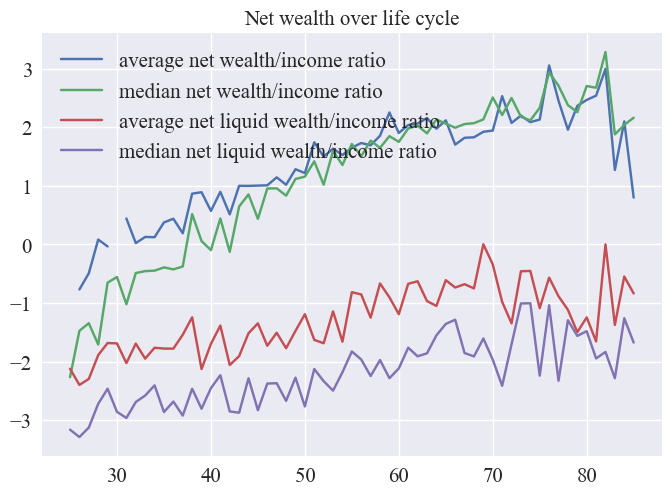

In [21]:
plt.title('Net wealth over life cycle')
plt.plot(np.log(age_av_w2i),label='average net wealth/income ratio')
plt.plot(np.log(age_med_w2i),label='median net wealth/income ratio')
plt.plot(np.log(age_av_lqw2i),label='average net liquid wealth/income ratio')
plt.plot(np.log(age_med_lqw2i),label='median net liquid wealth/income ratio')
plt.legend(loc=0)

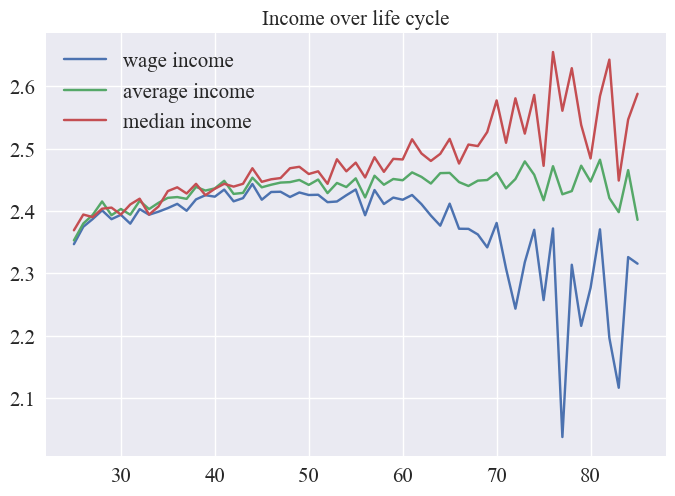

In [22]:
plt.title('Income over life cycle')

plt.plot(np.log(age_av_lwage_income),label='wage income')
plt.plot(np.log(age_av_lincome),label='average income')
plt.plot(np.log(age_med_lincome),label='median income')
plt.legend(loc=0)

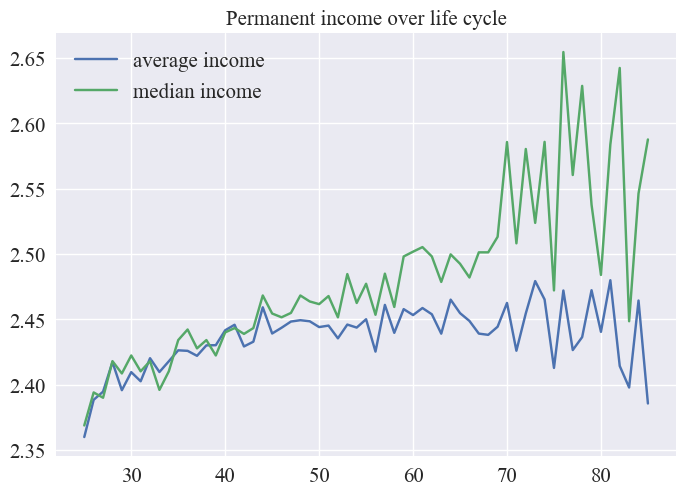

In [23]:
plt.title('Permanent income over life cycle')
plt.plot(np.log(age_av_lnorminc),label='average income')
plt.plot(np.log(age_med_lnorminc),label='median income')
plt.legend(loc=0)

In [24]:
## merge all age profiles 

to_merge = [age_med_wealth,
            age_av_lqwealth,
            age_med_lqwealth,
            age_av_w2i,
            age_med_w2i,
            age_av_lqw2i,
            age_med_lqw2i,
            age_av_lincome,
            age_med_lincome,
            age_av_lnorminc,
            age_med_lnorminc,
           age_av_lwage_income,
           age_med_lwage_income]

SCF_age_profile = age_av_wealth

for  df in to_merge:
    SCF_age_profile = pd.merge(SCF_age_profile,
                              df,
                              left_index=True,
                              right_index=True)
    


In [25]:
SCF_age_profile

,av_wealth,med_wealth,av_lqwealth,med_lqwealth,av_w2i,med_w2i,av_lqw2i,med_lqw2i,av_lincome,med_lincome,av_lnorminc,med_lnorminc,av_lwage_income,med_lwage_income
age,,,,,,,,,,,,,,
25,-2.870933e+03,4.094791e+03,4505.749259,1.480045e+03,-0.160719,0.103661,0.119671,0.042310,10.514401,10.685691,10.591380,10.685691,10.450853,10.531541
26,3.655462e+04,1.012598e+04,8076.605715,1.726719e+03,0.463935,0.229041,0.090888,0.037314,10.802372,10.958985,10.897515,10.958985,10.746207,10.819223
27,2.760602e+04,1.085366e+04,6538.663988,2.207734e+03,0.611384,0.260523,0.100608,0.043878,10.952523,10.914533,10.965459,10.914533,10.880612,10.819223
28,1.038160e+05,6.413529e+03,15509.177799,3.132762e+03,1.087291,0.181061,0.151185,0.065816,11.191209,11.062169,11.216247,11.224688,11.032525,10.980491
29,1.205127e+05,3.237599e+04,24916.387647,6.166855e+03,0.966926,0.521046,0.185788,0.085107,10.947384,11.081587,10.977881,11.119327,10.878115,11.022164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,4.339939e+06,1.319214e+07,137600.524810,6.166855e+04,12.694760,14.535451,0.190958,0.142860,11.965977,13.248441,11.941797,13.248441,10.702164,12.834126
82,6.005939e+06,1.813919e+07,63415.131471,8.336354e+04,20.055396,26.737359,1.001033,0.159458,11.252864,14.048049,11.183124,14.048049,8.992855,12.651804
83,1.251623e+06,7.670025e+05,20660.016241,1.356708e+04,3.566872,6.550273,0.253184,0.101891,11.000603,11.572649,11.000603,11.572649,8.302204,10.641332
